### Opens camera and tracks a yellow ball

In [51]:
# Name: vision3
# By viggo and mikkel and also mads D NN.
import numpy as np 
import argparse 
import matplotlib.pyplot as plt
import cv2


low_apple_red = (4.6, 218.79, 211.905)
high_apple_red = (3.95, 181, 171.12)
low_apple_raw = (0.0, 150.0, 150.0)
high_apple_raw = (15.0, 255.0, 255.0)

stream = cv2.VideoCapture(-1) 
if (stream.isOpened()==False):
    print("Error opeining video stream")

while(stream.isOpened()):
    try:
        ret, frame = stream.read()
        
        image_bgr = frame
        image = image_bgr.copy()
        image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

        mask_red = cv2.inRange(image_hsv,low_apple_red, high_apple_red)
        mask_raw = cv2.inRange(image_hsv,low_apple_raw, high_apple_raw)

        mask = mask_red + mask_raw

        if ret == True:
            cnts,_ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
            c_num=0
            for i,c in enumerate(cnts):
                # draw a circle enclosing the object
                ((x, y), r) = cv2.minEnclosingCircle(c)
                if r>34:
                    c_num+=1
                    cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
                    cv2.putText(image, "#{}".format(c_num), (int(x) - 10, int(y)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
                else:
                    continue

            cv2.imshow('Frame',image)

        if cv2.waitKey(25) & 0xff == ord('q'):
            break
    except:
        print("something wrong:")
        stream.release()
        cv2.destroyAllWindows()
## Release video capture object 
stream.release()
## Closes all video winwods
cv2.destroyAllWindows()



### When ball is found, make sure its in right position with right diameter

In [36]:
def depth_estimation(r):
    return 1246.1/(r**0.99)
def inside_rect(x,y,x1,y1,x2,y2):
    if (x > x1 and x < x2 and y > y1 and y < y2) :
        return True
    else :
        return False

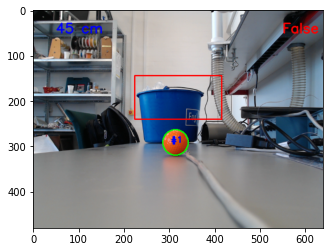

In [50]:
# Name: vision4
import numpy as np 
import argparse 
import matplotlib.pyplot as plt
import cv2

### defining HSV color spectrum
low_apple_red = (4.6, 218.79, 211.905)
high_apple_red = (3.95, 181, 171.12)
low_apple_raw = (0.0, 150.0, 150.0)
high_apple_raw = (15.0, 255.0, 255.0)

frame = cv2.imread(r'45.png')

## Converting image to HSV and defining mask 
image_bgr = frame
image = image_bgr.copy()
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
mask_red = cv2.inRange(image_hsv,low_apple_red, high_apple_red)
mask_raw = cv2.inRange(image_hsv,low_apple_raw, high_apple_raw)
mask = mask_red + mask_raw

### Finds the circles in the picture
cnts,_ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
c_num=0

## Defining rect shape
x1 = round(image.shape[1]*0.35)
y1 = round(image.shape[0]*0.3)
x2 = round(image.shape[1]*0.65)
y2 = round(image.shape[0]*0.5)
start_point = (x1, y1)
end_point = (x2, y2)
thickness = 2

color = (255, 0, 0)
## Text spec
fontScale = 1
org_depth_text = (50, 50)
org_p_in_rect =(550, 50)
font = cv2.FONT_HERSHEY_SIMPLEX


for i,c in enumerate(cnts):
    # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    if r>10:
        c_num+=1
        ## drawing circle around cnts
        cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
        ## Displaying circle number if more circles are found
        cv2.putText(image, "#{}".format(c_num), (int(x) - 10, int(y)), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
        
        ## Estime depth of circle 
        estimated_length = depth_estimation(r)
        ## Put the estimate depth on screen
        image = cv2.putText(image, f"{int(estimated_length)} cm", org_depth_text, font, 
                           fontScale, color, thickness, cv2.LINE_AA)
        ## Convert image to RGB 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ## Put rectangle on screen
        image = cv2.rectangle(image, start_point, end_point, color, thickness)  
        
        ## Check if point is inside rectangle
        inside = inside_rect(x,y,x1,y1,x2,y2)
        ## Put the result of the check on screen
        
        if inside == False:
            image = cv2.putText(image, f'{inside}', org_p_in_rect, font, 
                               fontScale, (255, 0, 0), thickness, cv2.LINE_AA)
        else:
            image = cv2.putText(image, f'{inside}', org_p_in_rect, font, 
                               fontScale, (0, 255, 0), thickness, cv2.LINE_AA)
            

        
## shows the entire image
plt.imshow(image)
## Release video capture object 
stream.release()
## Closes all video winwods
cv2.destroyAllWindows()

